### Feature Engineering 
a) Perform basic exploration like checking for top 5 records, 
shape, statistical info, duplicates, Null values etc. 


b) Extract Date, Month, Year from Date of Journey column


In [30]:
import pandas as pd
import numpy as np

In [31]:

# Specify the encoding when reading the CSV file
df = pd.read_excel("Flight_Price_Train.xlsx")




In [32]:
# Check the top 5 records
df.head(5)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [33]:
#shape of data
df.shape

(10683, 11)

In [34]:
# Provide statistical information
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [35]:
# Check for duplicates
df[df.duplicated()]


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303
...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2 stops,No info,12819
10616,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,No info,13014
10634,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


In [36]:
# Check for Null (missing) values
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [37]:
# Extract Date, Month, and Year from Date of Journey
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])
df['Journey_Date'] = df['Date_of_Journey'].dt.day
df['Journey_Month'] = df['Date_of_Journey'].dt.month
df['Journey_Year'] = df['Date_of_Journey'].dt.year

# Display the modified DataFrame
print("\nModified DataFrame with Date, Month, and Year columns:\n", df.head())



Modified DataFrame with Date, Month, and Year columns:
        Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      2019-03-24  Banglore   New Delhi              BLR → DEL   
1    Air India      2019-01-05   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways      2019-09-06     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      2019-12-05   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      2019-01-03  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  \
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897   
1    05:50         13:15   7h 25m     2 stops         No info   7662   
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882   
3    18:05         23:30   5h 25m      1 stop         No info   6218   
4    16:50         21:35   4h 45m      1 stop         No info  13302   

   Journey_Date  Journey_Month  Jou

C:\Users\Mukesh\AppData\Local\Temp\ipykernel_9388\4203903228.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])


In [38]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9,2019
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12,2019
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1,2019


###  Exploratory Data Analysis (EDA) 
a) Which airline is most preferred airline

c) Find the majority of the flights take off from which source

d) Find maximum flights land in which destination

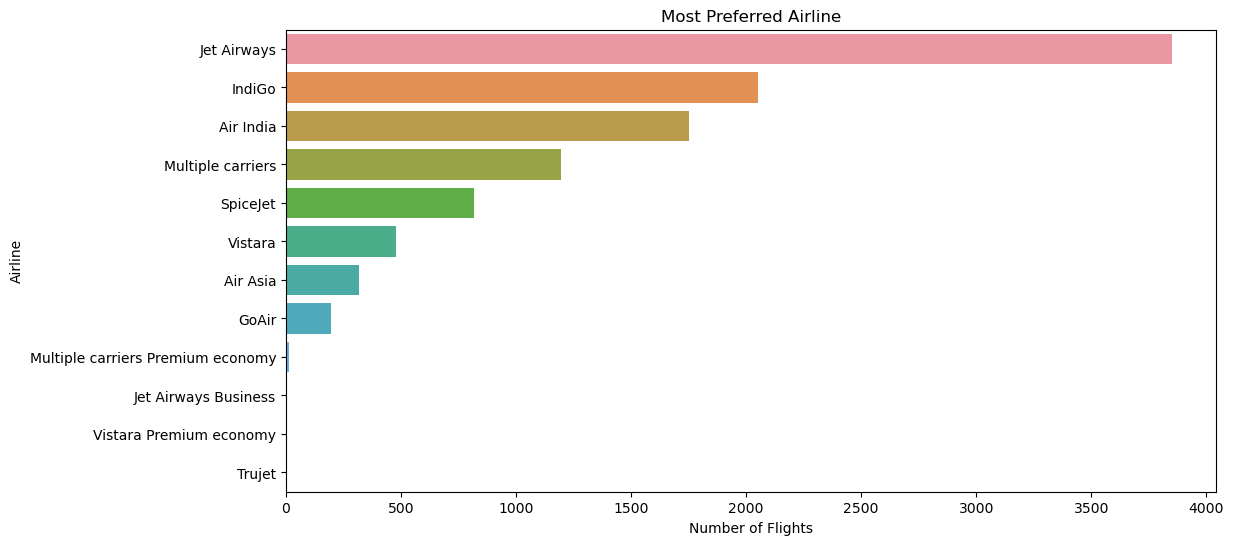

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of flights by each airline
preferred_airline = df['Airline'].value_counts().reset_index()
preferred_airline.columns = ['Airline', 'Number of Flights']

# Plot the most preferred airline
plt.figure(figsize=(12, 6))
sns.barplot(x='Number of Flights', y='Airline', data=preferred_airline)
plt.title("Most Preferred Airline")
plt.xlabel("Number of Flights")
plt.ylabel("Airline")
plt.show()

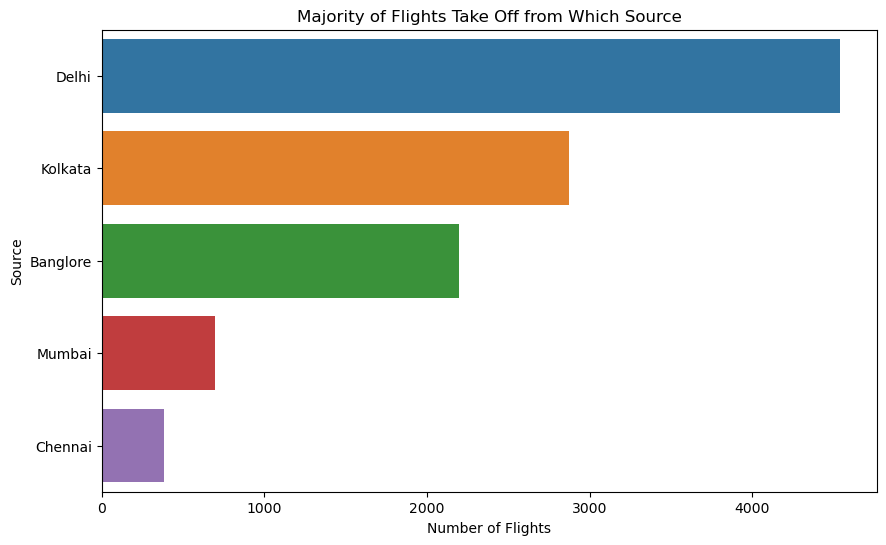

In [40]:
# Count the number of flights by source
source_counts = df['Source'].value_counts().reset_index()
source_counts.columns = ['Source', 'Number of Flights']

# Plot the majority of flights take off from which source
plt.figure(figsize=(10, 6))
sns.barplot(x='Number of Flights', y='Source', data=source_counts)
plt.title("Majority of Flights Take Off from Which Source")
plt.xlabel("Number of Flights")
plt.ylabel("Source")
plt.show()


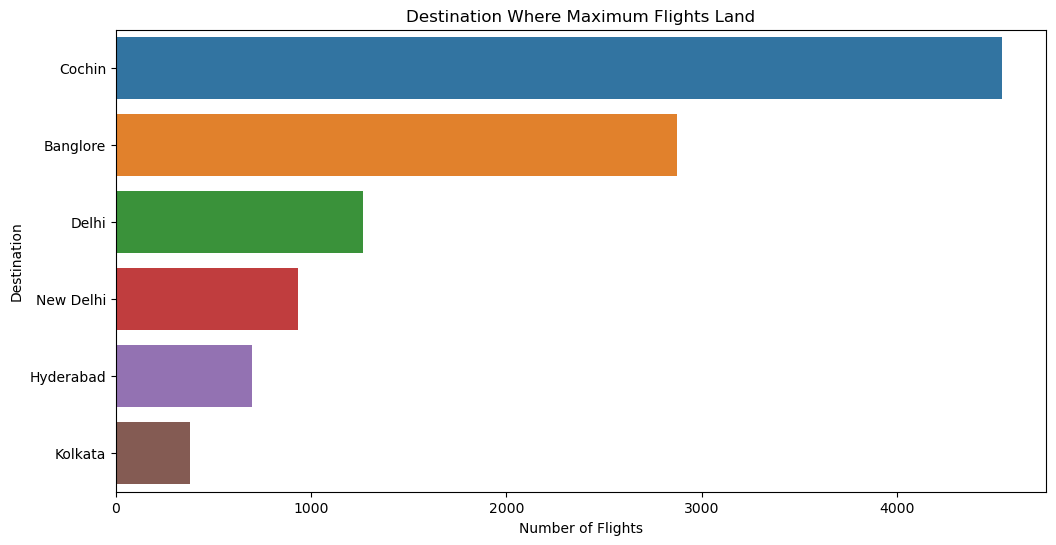

In [41]:
# Count the number of flights by destination
destination_counts = df['Destination'].value_counts().reset_index()
destination_counts.columns = ['Destination', 'Number of Flights']

# Plot the destination where maximum flights land
plt.figure(figsize=(12, 6))
sns.barplot(x='Number of Flights', y='Destination', data=destination_counts)
plt.title("Destination Where Maximum Flights Land")
plt.xlabel("Number of Flights")
plt.ylabel("Destination")
plt.show()


### Q.3 Compare independent features with Target feature to check the impact on price

a) Which airline has the highest price 

b) Check if the business class flights are high price or low and find 

only those flights which price is higher than 50k

In [42]:
# a) Which airline has the highest price:
highest_price_airline = df.groupby('Airline')['Price'].mean().idxmax()
highest_price = df.groupby('Airline')['Price'].mean().max()

print(f"a) The airline with the highest average price is '{highest_price_airline}' with an average price of {highest_price:.2f}.")

a) The airline with the highest average price is 'Jet Airways Business' with an average price of 58358.67.


In [43]:
# b) Check if business class flights are high price or low and find flights with price > 50k:
business_class_flights = df[df['Additional_Info'].str.contains("Business class", case=False)]

# Compare average prices of business class and non-business class flights
average_price_business_class = business_class_flights['Price'].mean()
average_price_non_business_class = df[~df['Additional_Info'].str.contains("Business class", case=False)]['Price'].mean()

print(f"b) Average price of business class flights: {average_price_business_class:.2f}")
print(f"   Average price of non-business class flights: {average_price_non_business_class:.2f}")

# Find flights with price > 50,000
high_price_flights = df[df['Price'] > 50000]

print("\nFlights with price higher than 50,000:")
print(high_price_flights)

b) Average price of business class flights: 56811.25
   Average price of non-business class flights: 9069.19

Flights with price higher than 50,000:
                    Airline Date_of_Journey    Source Destination  \
657    Jet Airways Business      2019-01-03  Banglore   New Delhi   
1478            Jet Airways      2019-03-18  Banglore   New Delhi   
2618            Jet Airways      2019-03-18  Banglore   New Delhi   
2924   Jet Airways Business      2019-01-03  Banglore   New Delhi   
5372   Jet Airways Business      2019-01-03  Banglore   New Delhi   
5439            Jet Airways      2019-01-03  Banglore   New Delhi   
9715   Jet Airways Business      2019-06-03     Delhi      Cochin   
10364  Jet Airways Business      2019-01-03  Banglore   New Delhi   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
657          BLR → BOM → DEL    05:45         10:45       5h      1 stop   
1478         BLR → BOM → DEL    18:40  00:45 16 Mar    6h 5m      1 stop   
2

### Q.4 Perform encoding for the required features according to the data


In [44]:
# Encode Airline, Source, and Destination using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Airline', 'Source', 'Destination'], drop_first=True)


In [45]:
# Encode Route using label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_encoded['Route'] = le.fit_transform(df_encoded['Route'])


In [46]:
# Encode Additional_Info using one-hot encoding
df_encoded = pd.get_dummies(df_encoded, columns=['Additional_Info'], drop_first=True)

In [47]:
# Map Total_Stops to numerical values
stop_mapping = {'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}
df_encoded['Total_Stops'] = df_encoded['Total_Stops'].map(stop_mapping)

In [48]:

# Display the first few rows of the encoded DataFrame
df_encoded.head()

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_Date,Journey_Month,Journey_Year,...,Destination_New Delhi,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,2019-03-24,18,22:20,01:10 22 Mar,2h 50m,0.0,3897,24,3,2019,...,1,0,0,0,0,0,0,0,1,0
1,2019-01-05,84,05:50,13:15,7h 25m,2.0,7662,5,1,2019,...,0,0,0,0,0,0,0,0,1,0
2,2019-09-06,118,09:25,04:25 10 Jun,19h,2.0,13882,6,9,2019,...,0,0,0,0,0,0,0,0,1,0
3,2019-12-05,91,18:05,23:30,5h 25m,1.0,6218,5,12,2019,...,0,0,0,0,0,0,0,0,1,0
4,2019-01-03,29,16:50,21:35,4h 45m,1.0,13302,3,1,2019,...,1,0,0,0,0,0,0,0,1,0


In [49]:
# Extract duration in minutes from the "Duration" column
df_encoded['Duration_minutes'] = df_encoded['Duration'].str.split().apply(
    lambda x: int(x[0][0]) * 60 + int(x[1][0]) if len(x) == 2 else int(x[0][0]) * 60
)

# Drop the original "Duration" column
df_encoded.drop('Duration', axis=1, inplace=True)

In [50]:
# Convert the 'Date_of_Journey' column to datetime format
df_encoded['Date_of_Journey'] = pd.to_datetime(df_encoded['Date_of_Journey'])

# Extract the hour and minute as new numerical features
df_encoded['Journey_hour'] = df_encoded['Date_of_Journey'].dt.hour
df_encoded['Journey_minute'] = df_encoded['Date_of_Journey'].dt.minute

# Drop the original 'Date_of_Journey' column
df_encoded = df_encoded.drop('Date_of_Journey', axis=1)




In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score




In [52]:
print(df_encoded.columns)


Index(['Route', 'Dep_Time', 'Arrival_Time', 'Total_Stops', 'Price',
       'Journey_Date', 'Journey_Month', 'Journey_Year', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi',
       'Additional_Info_1 Short layover', 'Additional_Info_2 Long layover',
       'Additional_Info_Business class', 'Additional_Info_Change airports',
       'Additional_Info_In-flight meal not included',
       'Additional_Info_No Info',
       'Additional_Info_No check-in baggage included',
       'Additional_Info_No info', 'Additional_Info_Red-eye flight',
  

In [56]:
# Check for columns with string values
columns_with_string = X_train.select_dtypes(include=['object']).columns
print(f"Columns with string values: {columns_with_string}")


Columns with string values: Index(['Dep_Time', 'Arrival_Time'], dtype='object')


In [63]:
# Extract hour and minute from 'Dep_Time' and 'Arrival_Time'
X_train['Dep_Hour'] = pd.to_datetime(X_train['Dep_Time']).dt.hour
X_train['Dep_Minute'] = pd.to_datetime(X_train['Dep_Time']).dt.minute
X_train['Arrival_Hour'] = pd.to_datetime(X_train['Arrival_Time']).dt.hour
X_train['Arrival_Minute'] = pd.to_datetime(X_train['Arrival_Time']).dt.minute

# Drop the original 'Dep_Time' and 'Arrival_Time' columns
X_train = X_train.drop(['Dep_Time', 'Arrival_Time'], axis=1)


In [64]:
# Extract hour and minute from 'Dep_Time' and 'Arrival_Time'
X_test['Dep_Hour'] = pd.to_datetime(X_test['Dep_Time']).dt.hour
X_test['Dep_Minute'] = pd.to_datetime(X_test['Dep_Time']).dt.minute
X_test['Arrival_Hour'] = pd.to_datetime(X_test['Arrival_Time']).dt.hour
X_test['Arrival_Minute'] = pd.to_datetime(X_test['Arrival_Time']).dt.minute

# Drop the original 'Dep_Time' and 'Arrival_Time' columns
X_test = X_test.drop(['Dep_Time', 'Arrival_Time'], axis=1)


In [65]:
from sklearn.impute import SimpleImputer

# Instantiate the imputer with the desired strategy (e.g., 'mean', 'median', 'most_frequent')
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the training data
X_train_imputed = imputer.fit_transform(X_train)

# Transform the test data using the same imputer
X_test_imputed = imputer.transform(X_test)


In [67]:
# Drop rows with missing values from both training and test sets
X_train = X_train.dropna()
y_train = y_train[X_train.index]  # Update target variable accordingly

X_test = X_test.dropna()
y_test = y_test[X_test.index]  # Update target variable accordingly


In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create a Linear Regression model
linear_reg = LinearRegression()

# Train the model on the training data
linear_reg.fit(X_train, y_train)

# Make predictions on the test data
linear_reg_preds = linear_reg.predict(X_test)

# Evaluate the model's performance
linear_reg_mae = mean_absolute_error(y_test, linear_reg_preds)
linear_reg_rmse = mean_squared_error(y_test, linear_reg_preds, squared=False)
linear_reg_r2 = r2_score(y_test, linear_reg_preds)

# Print evaluation metrics
print(f"Mean Absolute Error: {linear_reg_mae}")
print(f"Root Mean Squared Error: {linear_reg_rmse}")
print(f"R-squared: {linear_reg_r2}")


Mean Absolute Error: 1791.9693991688018
Root Mean Squared Error: 2622.631849022016
R-squared: 0.6750043069711575


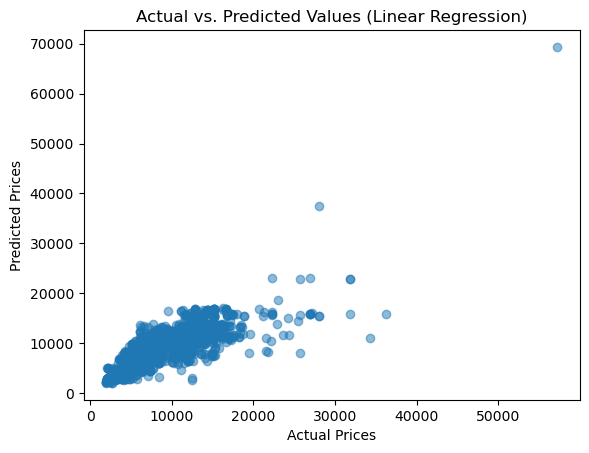

In [69]:
import matplotlib.pyplot as plt

# Assuming 'linear_reg' is your trained Linear Regression model
# and 'linear_reg_preds' are the predicted values on the test set

# Scatter plot of actual vs. predicted values
plt.scatter(y_test, linear_reg_preds, alpha=0.5)
plt.title('Actual vs. Predicted Values (Linear Regression)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()


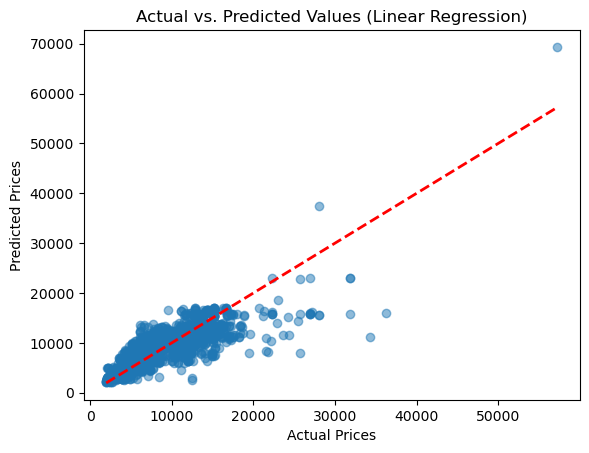

In [70]:
# Plot the line of best fit
plt.scatter(y_test, linear_reg_preds, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.title('Actual vs. Predicted Values (Linear Regression)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()
